## 3 - Usando Loops

Criamos uma função chamada `analyze` que cria gráficos das taxas de inflamação diária mínima, média e máxima para um único conjunto de dados:

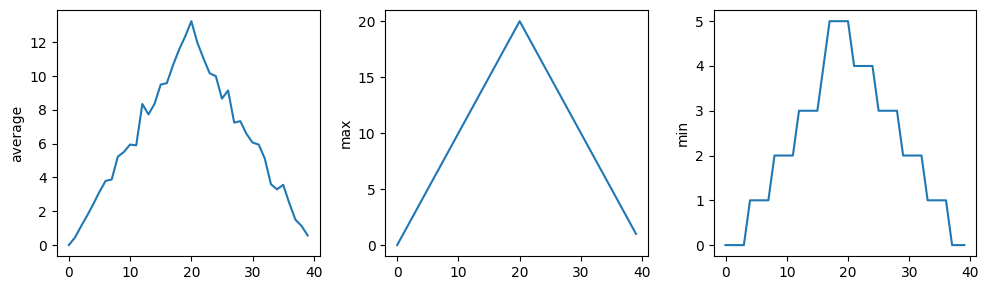

In [3]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

def analyze(filename):
    data = np.loadtxt(fname=filename, delimiter=',')
    
    plt.figure(figsize=(10.0, 3.0))
    
    plt.subplot(1, 3, 1)
    plt.ylabel('average')
    plt.plot(data.mean(0))
    
    plt.subplot(1, 3, 2)
    plt.ylabel('max')
    plt.plot(data.max(0))
    
    plt.subplot(1, 3, 3)
    plt.ylabel('min')
    plt.plot(data.min(0))
    
    plt.tight_layout()
    plt.show()

analyze('data/inflammation-01.csv')

Podemos usá-lo para analisar outros conjuntos de dados um a um:

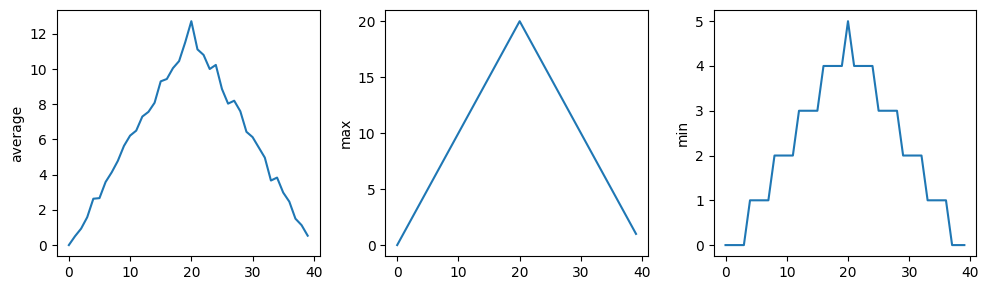

In [11]:
analyze('data/inflammation-02.csv')

mas temos uma dúzia de conjuntos de dados agora e mais no caminho.
Queremos criar gráficos para todos os nossos conjuntos de dados com uma única declaração.
Para fazer isso, teremos que ensinar ao computador como repetir as coisas.

### For Loops

Suponha que queremos imprimir cada letra na palavra "casa" em uma linha própria.
Uma maneira é usar quatro funções `print`:


In [12]:
def print_characters(element):
    print (element[0])
    print (element[1])
    print (element[2])
    print (element[3])

print_characters('casa')

c
a
s
a


mas essa é uma abordagem ruim por dois motivos:

1. Não escala:
     se quisermos imprimir os caracteres em uma string com centenas de letras,
     Seríamos melhores simplesmente digitá-los.

1. É frágil:
     se lhe darmos uma string mais longa,
     ele apenas imprime parte dos dados,
     e se nós o fizemos mais curto,
     Isso produz um erro porque estamos pedindo caracteres que não existem.

In [13]:
print_characters('ler')

l
e
r


IndexError: string index out of range

Aqui está uma melhor abordagem, mais curta e robusta:

In [14]:
def print_characters(element):
    for char in element:
        print (char)

print_characters('casa')

c
a
s
a


In [15]:
print_characters('oxygen')

o
x
y
g
e
n


A versão melhorada de `print_characters` usa um [for loop](http://swcarpentry.github.io/python-novice-inflammation-2.7/reference.html#for-loop)
para repetir uma operação --- neste caso, imprimir --- uma vez para cada item em uma coleção de itens.
A forma geral de um loop é:

<pre>
<strong>for</strong> <em>variável</em> <strong>in</strong> <em>coleção</em><strong>:</strong>
    <em>faça algo com a variável</em>
</pre>

Observe também que encontrar o comprimento de uma string é uma operação tão comum
que Python realmente possui uma função incorporada para fazer isso chamado `len`:

In [16]:
print (len('aeiou'))

5


#### Exercícios

1. Python possui uma função integrada chamada `range` que cria uma lista de números:
     `range(3)` produz `[0, 1, 2]` `range(2, 5) `produz` [2, 3, 4]` e `rang (2, 10, 3) ` produz `[ 2, 5, 8]`.
     Usando `range`,
     escreva uma função que imprime os números naturais $N$:
    
    ~~~python
    print_N(3)
    1
    2
    3
    ~~~

2. Exponenciação está integrada no Python:

    ~~~python
    print 5**3
    125
    expo(5, 3)
    125
    ~~~
    
    Python possui uma função chamada `pow` que calcula o mesmo valor.
    Escreva uma função chamada `expo` que usa um loop para calcular o mesmo resultado.

3. Escreva uma função chamada `rev` que recebe uma string como entrada e produz uma nova string com os caracteres na ordem inversa:
    
    ~~~python
    print rev('Newton')
    notweN
    ~~~
    

In [27]:
# questao 1


In [38]:
# questao 2


In [50]:
# questao 3


### For com enumerate e for com Range

In [28]:
for i in range(5):
    print(i)

0
1
2
3
4


In [29]:
for i, valor in enumerate('Professor'):
    print('indice: ',i, ' - valor: ', valor)

indice:  0  - valor:  P
indice:  1  - valor:  r
indice:  2  - valor:  o
indice:  3  - valor:  f
indice:  4  - valor:  e
indice:  5  - valor:  s
indice:  6  - valor:  s
indice:  7  - valor:  o
indice:  8  - valor:  r


### Listas

Assim como um loop `for` é uma maneira de fazer operações várias vezes,
uma lista é uma maneira de armazenar muitos valores.
Ao contrário das matrizes NumPy, as listas já são incorporadas na linguagem.
Criamos uma lista colocando valores dentro de colchetes:

In [32]:
odds = [1, 3, 5, 7]
print ('odds are:', odds)

odds are: [1, 3, 5, 7]


Selecionamos elementos individuais de listas indexando-os:

In [33]:
print ('first and last:', odds[0], odds[-1])

first and last: 1 7


e se fizermos um loop sobre uma lista, a variável de loop recebe os elementos da lista um por vez:


In [34]:
for number in odds:
    print (number)

1
3
5
7


Existe uma diferença importante entre listas e strings:
podemos alterar os valores em uma lista,
mas não podemos alterar os caracteres em uma string.
Por exemplo:

In [35]:
names = ['Newton', 'Darwing', 'Turing'] # typo in Darwin's name
print ('names is originally:', names)
names[1] = 'Darwin' # correct the name
print ('final value of names:', names)

names is originally: ['Newton', 'Darwing', 'Turing']
final value of names: ['Newton', 'Darwin', 'Turing']


funcionou, mas:

In [51]:
name = 'Bell'
name[0] = 'b'

TypeError: 'str' object does not support item assignment

este não funciona.

> #### Mudanças
>
> Os dados que podem ser alterados são chamados de [mutáveis] (../../ gloss.html # mutable),
> enquanto dados que não podem são chamados de [imutáveis] (../../ gloss.html # immutable).
> Como strings,
> os números são imutáveis:
> não há como fazer com que o número 0 tenha o valor 1 ou vice-versa
> (pelo menos, não em Python &mdash; na verdade *são* linguagens que permitirão que as pessoas façam isso,
> com resultados previsivelmente confusos).
> Listas e arrays,
> por outro lado,
> são mutáveis:
> ambos podem ser modificados após terem sido criados.
>
> Os programas que modificam os dados no lugar podem ser mais difíceis de entender do que aqueles que não
> porque os leitores podem ter que resumir mentalmente muitas linhas de código
> para descobrir qual é o valor de algo realmente.
> Por outro lado,
> programas que modificam dados no lugar em vez de criar cópias que são quase idênticas ao original
> cada vez que desejam fazer uma pequena mudança
> são muito mais eficientes.

Há muitas maneiras de alterar o conteúdo das listas além de atribuir os elementos:

In [37]:
odds.append(11)
print ('odds after adding a value:', odds)

odds after adding a value: [1, 3, 5, 7, 11]


In [38]:
del odds[0]
print ('odds after removing the first element:', odds)

odds after removing the first element: [3, 5, 7, 11]


In [39]:
odds.reverse()
print ('odds after reversing:', odds)

odds after reversing: [11, 7, 5, 3]


#### Exercício

1. Escreva uma função chamada `total` que calcula a soma dos valores em uma lista.
     (Python possui uma função integrada chamada `sum` que faz isso para você.
     Não use isso para este exercício.)

### Processando vários arquivos

Agora temos quase tudo o que precisamos para processar todos os nossos arquivos de dados.
O que falta é uma biblioteca com um nome diferente:

In [52]:
import glob

A biblioteca `glob` contém uma única função, também chamada `glob`,
que encontra arquivos cujos nomes correspondem a um padrão.
Nós fornecemos esses padrões como strings:
- o caractere `*` corresponde a zero ou mais caracteres,
- enquanto `?` corresponde a qualquer caracter.

Podemos usar isso para obter os nomes de todos os Jupyter Notebooks que criamos até agora:

In [41]:
print (glob.glob('*.ipynb'))

['01-intro.ipynb', '02-funcoes.ipynb', '03-loop_listas_arquivos.ipynb', '04-cond.ipynb']


ou para obter os nomes de todos os nossos arquivos de dados CSV:

In [42]:
print (glob.glob('data/*.csv'))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


Como mostram esses exemplos,
O resultado do `glob.glob` é uma lista de strings,
o que significa que podemos usá-lo
para fazer algo com cada nome de arquivo, um por vez.
No nosso caso,
o "algo" que queremos é a nossa função `analyze`.
Vamos testá-lo analisando os três primeiros arquivos da lista:

data/inflammation-11.csv


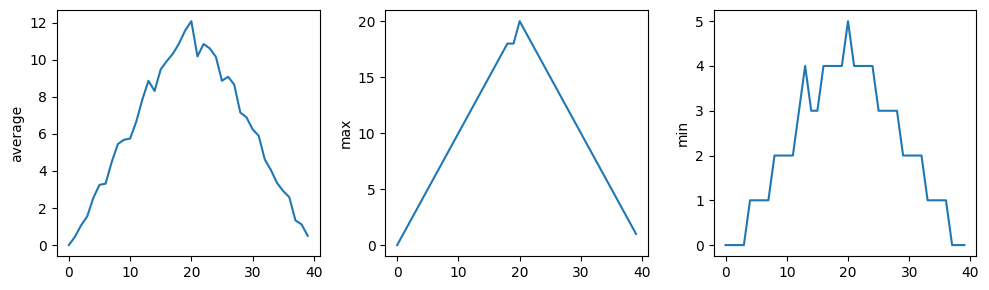

data/inflammation-12.csv


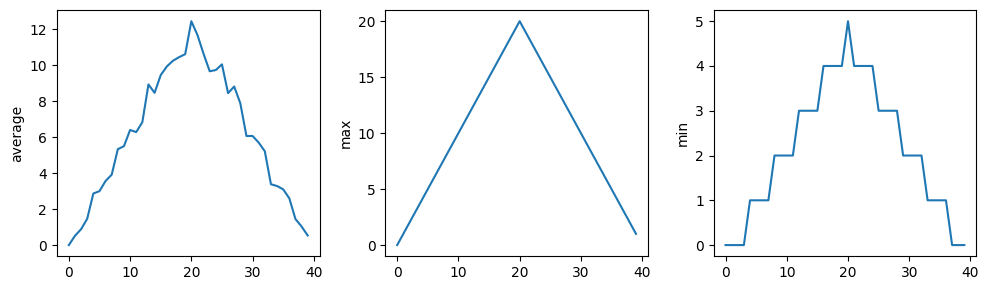

data/inflammation-06.csv


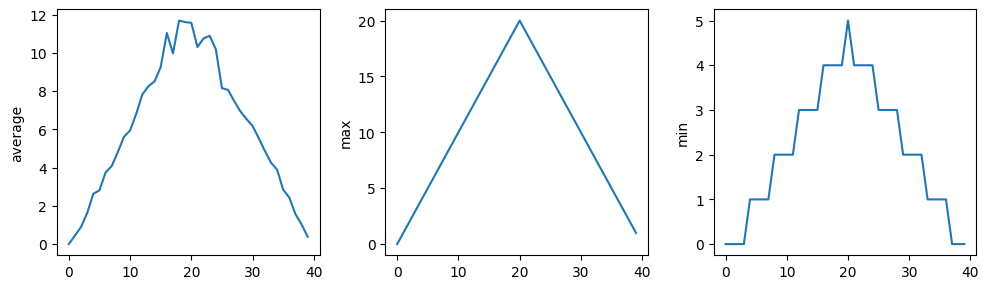

In [53]:
filenames = glob.glob('data/*.csv')
filenames = filenames[0:3]
for f in filenames:
    print (f)
    analyze(f)

#### Exercício

1. Escreva uma função chamada `analyse_all` que leva um padrão de nome de arquivo como único argumento e executa `analisar` para cada arquivo cujo nome corresponde ao padrão.

~~~python 
analyse_all(padrao)
~~~

In [55]:
#questao 1


#### Pontos Principais

* Uso do `for variavel in coleção` para processar os elementos de uma coleção um por vez.
* O corpo de um loop deve ser recuado.
* Usar `len (algo)` para determinar o comprimento de algo que contém outros valores.
* `[value1, value2, value3, ...]` cria uma lista.
* As listas são indexadas e cortadas da mesma forma que strings e arrays.
* As listas são mutáveis (ou seja, seus valores podem ser alterados no local).
* As strings são imutáveis (ou seja, os caracteres nelas não podem ser alterados).
* Use `glob.glob (padrão)` para criar uma lista de arquivos cujos nomes correspondem a um padrão.
* Use `*` em um padrão para combinar zero ou mais caracteres e `?` Para coincidir com um único caractere.